In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
data = pd.read_csv('/Users/subhadyutirath/Desktop/WalmartProject/Walmart_Sales.csv')

In [43]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [26]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [27]:
data.shape

(6435, 8)

In [28]:
col = data.columns.tolist()

In [29]:
col

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [31]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [32]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [33]:
data.duplicated().sum()

0

In [37]:
data.shape

(6435, 8)

In [38]:
data = data.drop_duplicates()

In [39]:
data.shape

(6435, 8)

In [72]:
Q1 = data['Weekly_Sales'].quantile(0.25)
Q3 = data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [73]:
print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)

First Quartile (Q1): 553350.105
Third Quartile (Q3): 1420158.66
Interquartile Range (IQR): 866808.5549999999


<Axes: xlabel='Weekly_Sales'>

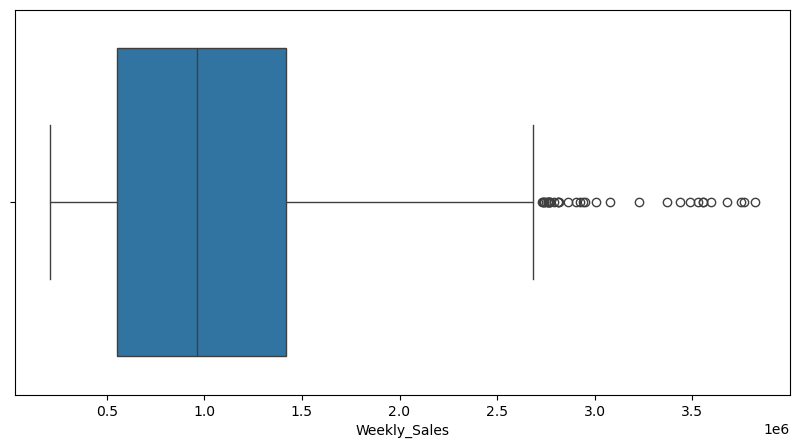

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Weekly_Sales'])

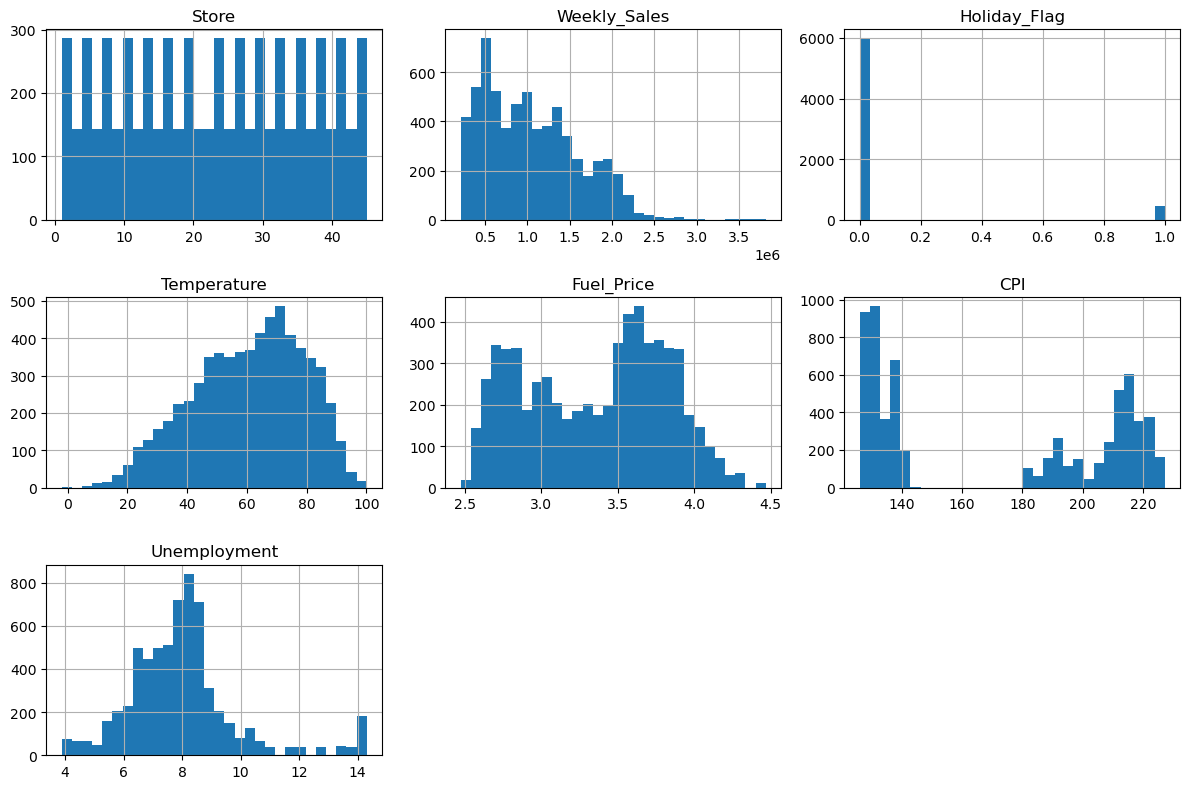

In [40]:
data.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

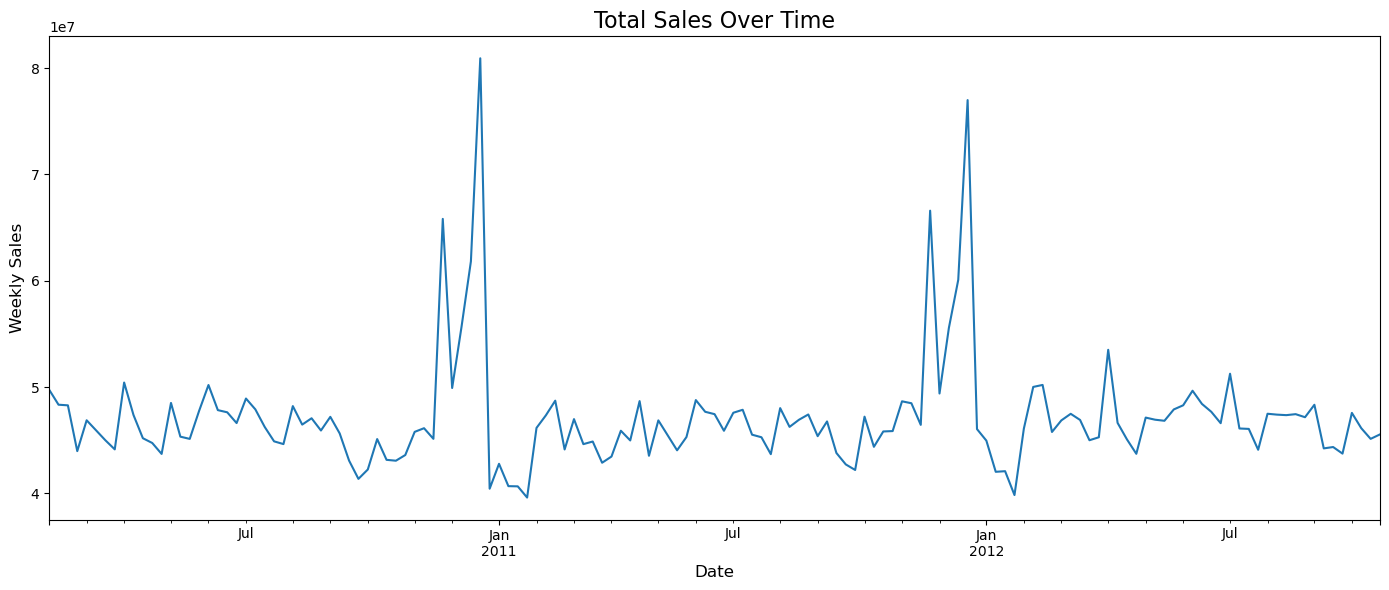

In [75]:
plt.figure(figsize=(14,6))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()

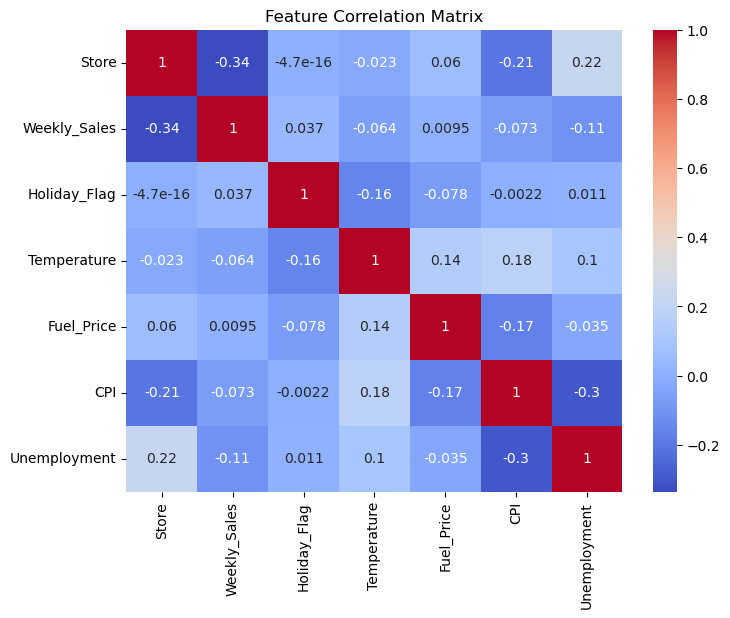

In [42]:
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [44]:
total_sales_by_store = (
    data.groupby('Store')['Weekly_Sales']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

In [68]:
total_sales_by_store['Weekly_Sales'] = total_sales_by_store['Weekly_Sales'].apply(lambda x: f"{x:,.0f}")

In [47]:
total_sales_by_store.head()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


/var/folders/p_/x7_5dzhn12s3szm569470r9r0000gn/T/ipykernel_71697/3786799344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data, palette="Set2")


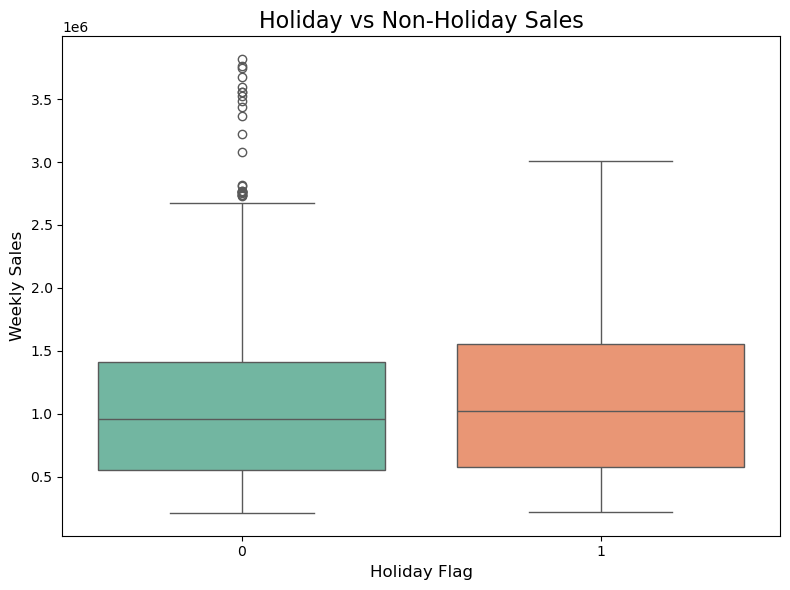

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data, palette="Set2")
plt.title('Holiday vs Non-Holiday Sales', fontsize=16)
plt.xlabel('Holiday Flag', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
holiday_sales=data[data['Holiday_Flag']==1]
holiday_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742


In [49]:
total_holiday_sales = (
    holiday_sales.groupby('Store')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

In [67]:
total_holiday_sales['Weekly_Sales'] = total_holiday_sales['Weekly_Sales'].apply(lambda x: f"{x:,.0f}")

In [50]:
total_holiday_sales.head()

,Store,Weekly_Sales
0,20,22490350.81
1,4,22431026.24
2,14,21205829.98
3,10,21137559.49
4,13,21130438.06


In [52]:
data['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [53]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [54]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [55]:
data['Year'] = data['Date'].dt.year


In [56]:
data['Year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int32

In [57]:
data["Year"].value_counts()

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

/var/folders/p_/x7_5dzhn12s3szm569470r9r0000gn/T/ipykernel_71697/2861193684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='viridis')


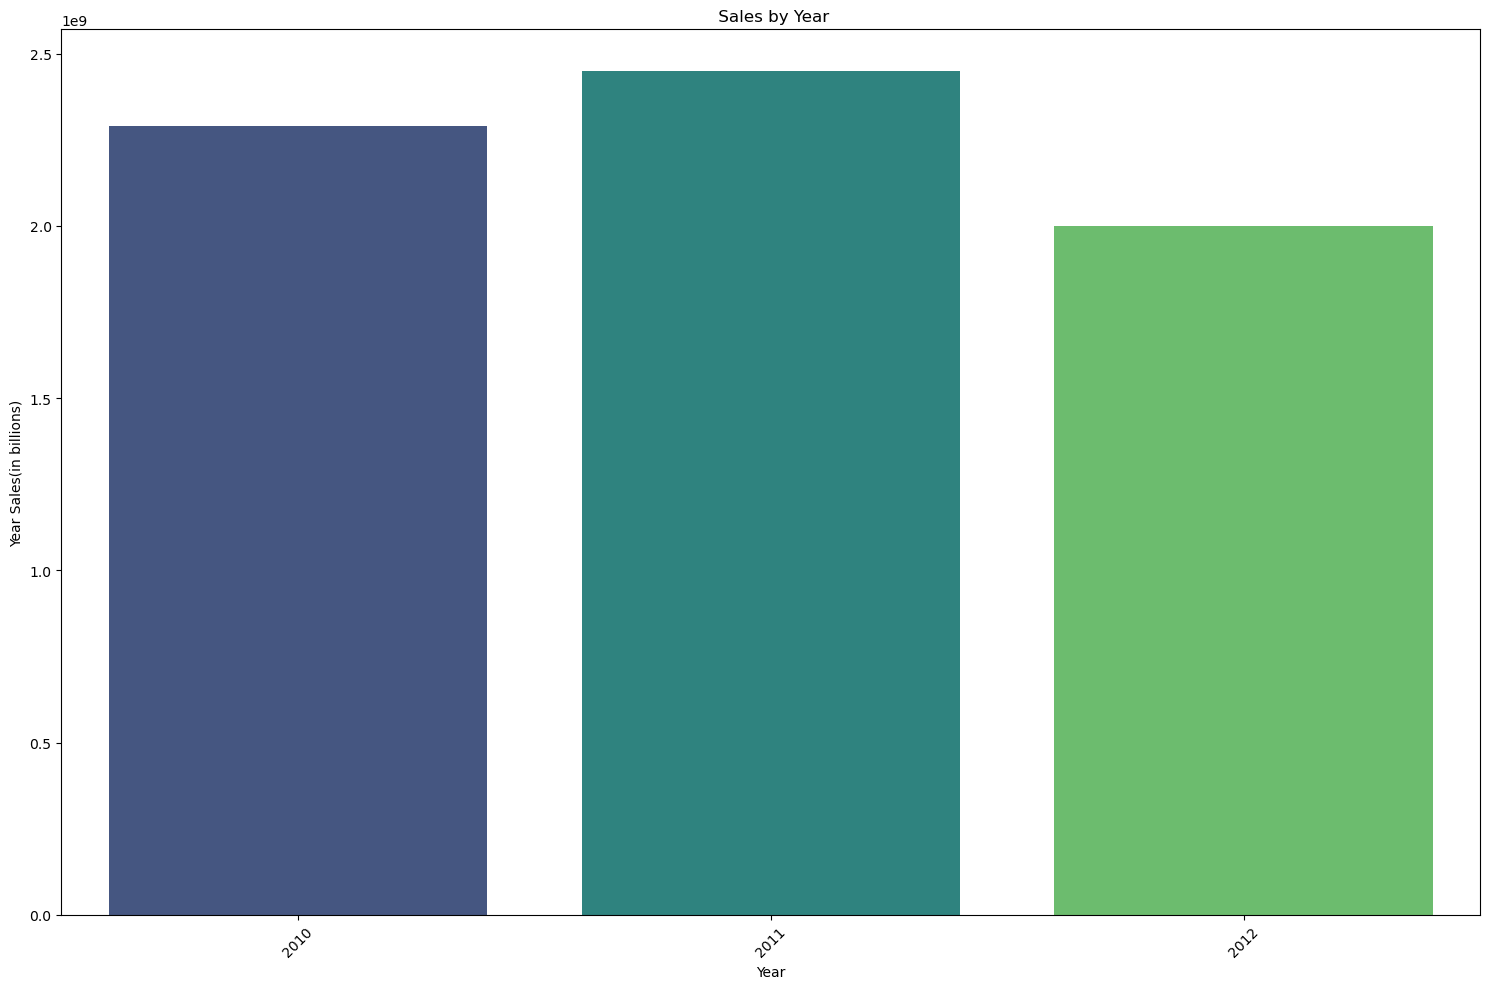

In [58]:
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='viridis')
plt.title(' Sales by Year')
plt.ylabel('Year Sales(in billions)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top_5_stores = (
    data.groupby('Store')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

In [60]:
top_5_stores

[20, 4, 14, 13, 2]

In [61]:
top_5_sales = (
    data[data['Store'].isin(top_5_stores)]
    .groupby('Store')['Weekly_Sales']
    .sum()
    .reset_index()
)

In [62]:
top_5_sales

,Store,Weekly_Sales
0,2,2.753824e+08
1,4,2.995440e+08
2,13,2.865177e+08
3,14,2.889999e+08
4,20,3.013978e+08


In [63]:
data['Month']=data['Date'].dt.month
top_5_months=(
    data.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).reset_index()
)

In [65]:
top_5_months['Month']=top_5_months['Month'].apply(lambda x: f'{x:,.0f}')

/var/folders/p_/x7_5dzhn12s3szm569470r9r0000gn/T/ipykernel_71697/3149173150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Weekly_Sales', data=top_5_months, palette='viridis')


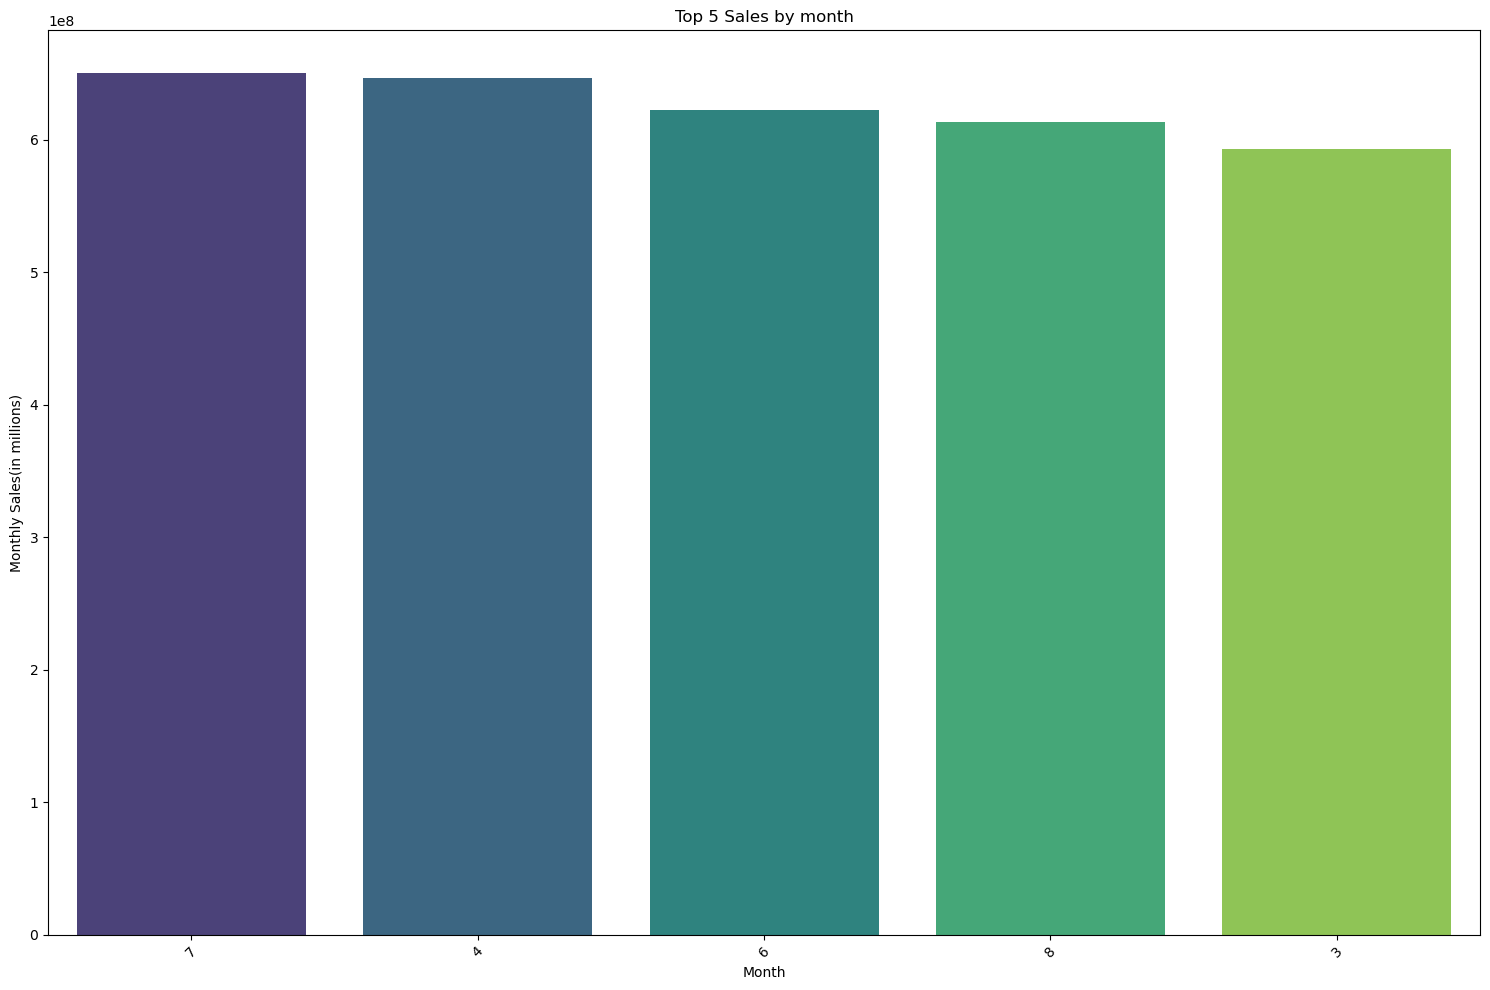

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month', y='Weekly_Sales', data=top_5_months, palette='viridis')
plt.title('Top 5 Sales by month')
plt.ylabel('Monthly Sales(in millions)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Inferences
# 1. The dataset contains sales data from multiple stores over several years.
# 2. There are no missing values or duplicates in the dataset.
# 3. The correlation heatmap indicates that there is a strong positive correlation between 'Weekly_Sales' and 'Temperature'.
# 4. Store-wise total sales analysis shows that certain stores outperform others significantly.
# 5. Holiday sales analysis reveals that some stores experience a substantial increase in sales during holiday periods.
# 6. Yearly sales trends indicate growth or decline patterns over the years.
# 7. Monthly sales analysis highlights specific months that generate the highest sales, which can inform promotional strategies.

In [ ]:
# Regression Model for predicting Weekly Sales 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
X = data[['Fuel_Price','CPI','Temperature','Unemployment']]
y = data['Weekly_Sales']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2:.4f}")

R² score on test set: 0.0175


In [82]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [84]:
print("Regression Coefficients: \n",coef_df)

Regression Coefficients: 
         Feature   Coefficient
0    Fuel_Price -22242.584135
1           CPI  -1632.232081
2   Temperature   -686.159123
3  Unemployment -43596.969808


In [85]:
print("\nIntercept:", model.intercept_)


Intercept: 1789909.7866092043


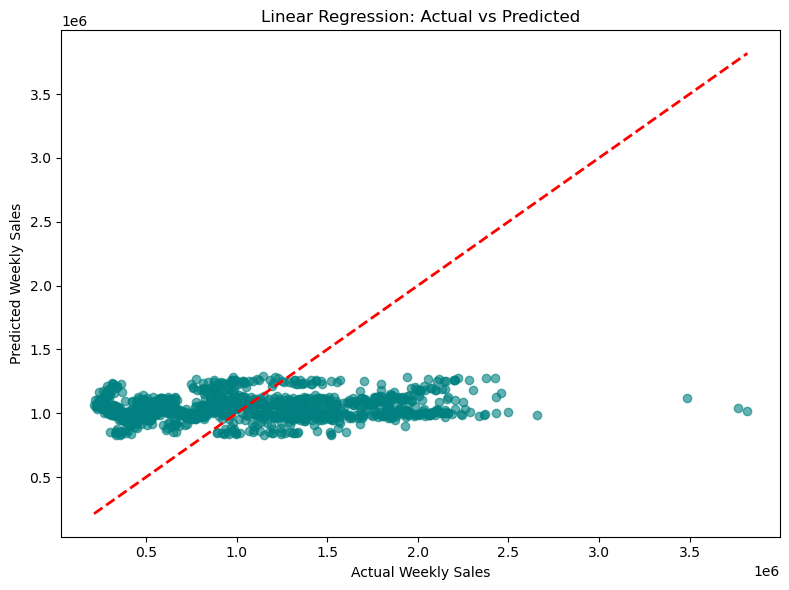

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()